<a href="https://colab.research.google.com/github/jlvoltan/bootcamp_python/blob/master/m2_cap4_boot_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Módulo 2 - Cap 4 - Bootcamp PYTHON**
*Atualizado em 30 JUL 2020* 

*jlvoltan*

# **Inteligência Artificial**

* Ideia de aprender com os exemplos
 * Supervisionado e não-supervisionado. 
 
* _"Seu modelo é tão bom quanto forem os dados que o alimentam"_
*  **scikit-learn**: framework voltado para IA
  * Implementa algoritmos de Classificação, regressão, redução de dimensionalidade, seleção de modelos, agrupamento e pré-processamento.
  * `pip install scikit-learn ou conda install scikit-learn`
  * Por ser uma biblioteca muito grande, normalmente, se importa módulo a módulo. Além disso o nome no import é *sklearn*
    * `from sklearn.preprocessing import LabelEncoder`
  * Possui dataset de exemplo



# Problemas de Classificação

* Temos amostras com suas características (features), separadas em classes (variável discreta).
* Fronteira de decisão
* Classificado binário (2 classes)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder #estamos importando uma Classe
from sklearn.linear_model import LogisticRegression #estamos importando uma Classe

In [2]:
arquivo_csv = pd.read_csv("http://pycourse.s3.amazonaws.com/temperature.csv")
arquivo_csv

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [3]:
x, y = arquivo_csv[['temperatura']].values, arquivo_csv[['classification']].values
print("x:"+ str(type(x)) +" \n"+ str(x))
print("y :"+ str(type(y)) +" \n"+ str(y))

x:<class 'numpy.ndarray'> 
[[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
y :<class 'numpy.ndarray'> 
[['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


In [4]:
# Pré processamento
#from sklearn.preprocessing import LabelEncoder
#codifica a string como int

le = LabelEncoder() 

#Método fit transform da classe LabelEncoder
#Estamos associando cada classe a um int, p.e.  quente =3 muito quente = 2 ...
y= le.fit_transform(y.ravel())
print("y :"+ str(type(y)) +" \n"+ str(y))

y :<class 'numpy.ndarray'> 
[3 2 3 3 0 1]


## **Modelo de classificação - Regressão logistica**

In [5]:
# Modelo de classificação - Regressão logistica
from sklearn.linear_model import LogisticRegression #estamos importando uma Classe

classificador = LogisticRegression()
classificador.fit(x,y)   # Treinamento do classificador, similar a encontrar os coef. da reta para a regressão linear

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# Estamos gerando valores por extrapolação para as temperaturas entre -10 e 50
# Serão preditos 150 valores linearmente espaçados
x_teste = np.linspace(start=-10, stop=50,num=150).reshape(-1,1)
y_pred = classificador.predict(x_teste)

In [7]:
#Vamos imprimir o valor da temperatura e o valor y previsto
print("Previsões:")
for a,b in zip(x_teste,y_pred):
  print(" Valor de x: " + str(a) + "---+--- Valor de y: " + str(b))
  if(a>-8):break #apenas para não poluir a tela com mt informação, imprimi só até -8ºC

Previsões:
 Valor de x: [-10.]---+--- Valor de y: 1
 Valor de x: [-9.59731544]---+--- Valor de y: 1
 Valor de x: [-9.19463087]---+--- Valor de y: 1
 Valor de x: [-8.79194631]---+--- Valor de y: 1
 Valor de x: [-8.38926174]---+--- Valor de y: 1
 Valor de x: [-7.98657718]---+--- Valor de y: 1


In [8]:
#Voltar a classificação de int para string
# Caminho inverso ao pre-processamento
y_pred = le.inverse_transform(y_pred)
print(type(y_pred))

<class 'numpy.ndarray'>


In [9]:
#Vamos imprimir o valor da temperatura e o valor y previsto
print("Previsões:")
for a,b in zip(x_teste,y_pred):
  print(" Valor de x: " + str(a) + "---+--- Valor de y: " + str(b))
  if(a>-8):break #apenas para não poluir a tela com mt informação, imprimi só até -8ºC

Previsões:
 Valor de x: [-10.]---+--- Valor de y: frio
 Valor de x: [-9.59731544]---+--- Valor de y: frio
 Valor de x: [-9.19463087]---+--- Valor de y: frio
 Valor de x: [-8.79194631]---+--- Valor de y: frio
 Valor de x: [-8.38926174]---+--- Valor de y: frio
 Valor de x: [-7.98657718]---+--- Valor de y: frio


### **Convertendo para um dataframe**
* 2 **numpy.array** irão virar um **dataframe**
* Serão duas colunas: temperatura e previsão_de_classificação


In [10]:
data_frame_previsao = {'Temperatura': x_teste.ravel(), 'previsao_classificacao': y_pred.ravel()}
data_frame_previsao = pd.DataFrame(data_frame_previsao)

### **Gráfico, estatística e tudo que um dataframe permite**

* Com um dataframe, temos diversas opções:
  * head(), tail( ) == > Verificar extremos
  * info(), describe() ==> análise dos dados e estatísticas
  * Diversos gráficos


In [11]:
data_frame_previsao.head()

,Temperatura,previsao_classificacao
0,-10.000000,frio
1,-9.597315,frio
2,-9.194631,frio
3,-8.791946,frio
4,-8.389262,frio


In [12]:
data_frame_previsao.tail()

,Temperatura,previsao_classificacao
145,48.389262,muito quente
146,48.791946,muito quente
147,49.194631,muito quente
148,49.597315,muito quente
149,50.000000,muito quente


In [13]:
data_frame_previsao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperatura             150 non-null    float64
 1   previsao_classificacao  150 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


* Vendo a quantidade de elementos em cada classe


In [14]:
# Vendo a quantidade de elementos em cada classe
data_frame_previsao['previsao_classificacao'].value_counts()

frio            81
muito quente    48
quente          15
confortavel      6
Name: previsao_classificacao, dtype: int64

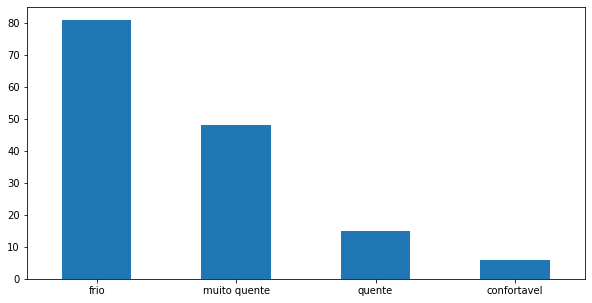

In [15]:
data_frame_previsao['previsao_classificacao'].value_counts().plot.bar(figsize=(10,5), rot=0);

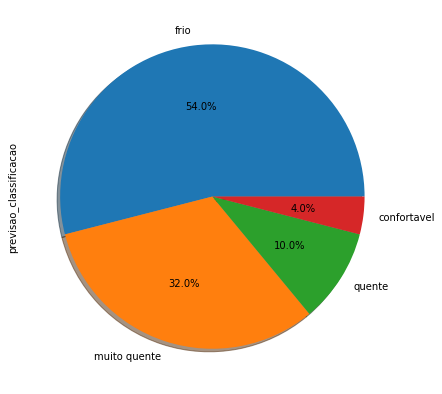

In [16]:
data_frame_previsao['previsao_classificacao'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, figsize = (10,7));

* Outras informações estatísticas sobre os dados previstos

In [17]:
data_frame_previsao.describe()

,Temperatura
count,150.000000
mean,20.000000
std,17.494779
min,-10.000000
25%,5.000000
50%,20.000000
75%,35.000000
max,50.000000


* Gráfico do tipo boxplot
 * Mostra os quartis da cada classe
 * Mín, Máx, Mediana

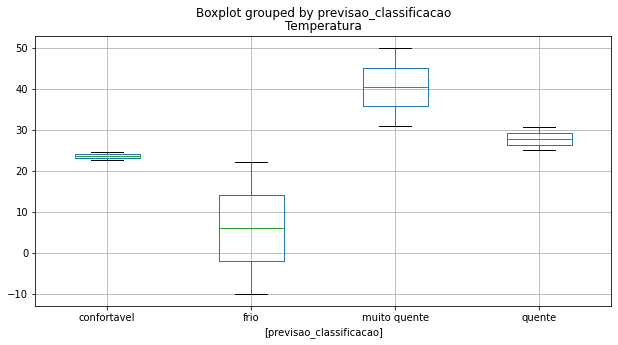

In [18]:
data_frame_previsao.boxplot(by='previsao_classificacao', figsize=(10,5));

###Usando o modelo proposto
* ideia de montar uma função em que se receba a temperatura, e com base no classificador montado, se responda a qual classe ela pertenceria

In [19]:
def classificacao_preditiva_temp(nova_temp):
  #Transformando o float em um nump array
  nova_temp = np.array(nova_temp).reshape(-1,1)
  
  #Usando o classificador para decobrir a qual classe (int) pertence
  classe_temp = classificador.predict(nova_temp)

  # Converter a classe de int para a categoria
  classe_temp = le.inverse_transform(classe_temp)

  return classe_temp

In [20]:
loop = 1
while loop:
  temp = float(input("Digite a temperatura atual em ºC: "))
  a= classificacao_preditiva_temp(temp)
  print("Agora está: ",a)
  loop= int(input("Deseja informar outra temperatura?\n 1- Sim 0-Não:  "))

Digite a temperatura atual em ºC: 10
Agora está:  ['frio']
Deseja informar outra temperatura?
 1- Sim 0-Não:  0
